In [1]:
from imp import reload
import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
# Use Type 1 fonts in plots.
matplotlib.rcParams['ps.useafm'] = True
matplotlib.rcParams['pdf.use14corefonts'] = True
matplotlib.rcParams['text.usetex'] = False
# Do not wrap long lines
np.set_printoptions(linewidth=np.nan)
sns.set_style("whitegrid")
import runner
import umm
import mallows_hamming as mh

In [44]:
# instance synthetic, the best sol is
n = 20
flow = np.random.random((n,n))
for i in range(n):
    for j in range(n):
        if i==j: flow[i,i]=0
        else: flow[i,j] += 1/(abs(i-j))
for i in range(n):
    for j in range(n):
#         print(round(flow[i,j],4), " ", end="")
        print(round((abs(i-j)),4), " ", end="") #distance between locations
    print()

0  1  2  3  4  5  6  7  8  9  10  11  12  13  14  15  16  17  18  19  
1  0  1  2  3  4  5  6  7  8  9  10  11  12  13  14  15  16  17  18  
2  1  0  1  2  3  4  5  6  7  8  9  10  11  12  13  14  15  16  17  
3  2  1  0  1  2  3  4  5  6  7  8  9  10  11  12  13  14  15  16  
4  3  2  1  0  1  2  3  4  5  6  7  8  9  10  11  12  13  14  15  
5  4  3  2  1  0  1  2  3  4  5  6  7  8  9  10  11  12  13  14  
6  5  4  3  2  1  0  1  2  3  4  5  6  7  8  9  10  11  12  13  
7  6  5  4  3  2  1  0  1  2  3  4  5  6  7  8  9  10  11  12  
8  7  6  5  4  3  2  1  0  1  2  3  4  5  6  7  8  9  10  11  
9  8  7  6  5  4  3  2  1  0  1  2  3  4  5  6  7  8  9  10  
10  9  8  7  6  5  4  3  2  1  0  1  2  3  4  5  6  7  8  9  
11  10  9  8  7  6  5  4  3  2  1  0  1  2  3  4  5  6  7  8  
12  11  10  9  8  7  6  5  4  3  2  1  0  1  2  3  4  5  6  7  
13  12  11  10  9  8  7  6  5  4  3  2  1  0  1  2  3  4  5  6  
14  13  12  11  10  9  8  7  6  5  4  3  2  1  0  1  2  3  4  5  
15  14  13  12 

## Running UMM and CEGO over one instance

The next cell allows running CEGO and UMM over a chosen instance and with the selected parameters

Reading instance from qap/test.dat
TEST DISTANCE  2 1700.3617550000004 67.23719719339495
TEST DISTANCE  3 1740.9523700000002 45.467486399097304
TEST DISTANCE  4 1741.3066799999997 69.26377462163467
TEST DISTANCE  5 1771.022965 47.72202228806188
TEST DISTANCE  6 1791.2456350000004 55.26159343889998
TEST DISTANCE  7 1817.27511 48.914072227089214
TEST DISTANCE  8 1858.12142 50.1172712841352
TEST DISTANCE  9 1885.6350750000001 38.84254441378516
TEST DISTANCE  10 1870.7279349999997 63.31471520715606
TEST DISTANCE  11 1923.500555 45.419574668302126
TEST DISTANCE  12 1924.06656 46.51078574417335
TEST DISTANCE  13 1940.03037 45.4276059581627
TEST DISTANCE  14 1971.3306499999999 38.921097258986656
TEST DISTANCE  15 1965.9143450000004 48.33301221548762
TEST DISTANCE  16 1961.22238 51.58008024535832
TEST DISTANCE  17 1984.6746899999998 26.797815837730152
TEST DISTANCE  18 1987.221645 46.91725296055254
TEST DISTANCE  19 1978.93512 47.71734565912693
Hungar
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13

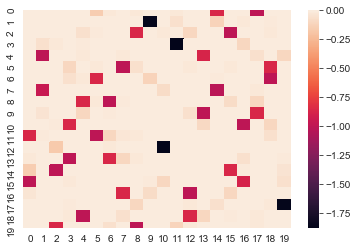

[17  9 15 11  1  7 18 14  6 13 16  5 10  3  2  0 12 19  4  8]
[0.   0.01 0.1  0.05 0.   0.01 0.02 0.86 1.   0.02]
10.86	20	116	0.000396728515625	2000.4336	0.109375
10.86	20	116	0.0002899169921875	1940.4889999999998	0.109375
10.86	20	104	9.5367431640625e-06	1947.9002	0.109375
10.16	20	104	6.556510925292969e-07	1941.6048999999998	0.1015625
10.16	20	104	9.094947017729282e-12	1980.9402	0.1015625
10.16	20	104	9.094947017729282e-12	2011.9337	0.1015625
10.16	20	104	9.094947017729282e-12	1947.9488	0.1015625
10.16	20	104	8.881784197001252e-16	2004.3441	0.1015625
10.16	20	104	8.881784197001252e-16	1949.0576	0.1015625
10.16	20	104	1.0408340855860843e-17	2002.2171	0.1015625
10.16	20	104	2.1316282072803006e-14	1963.0509	0.1015625
10.16	20	104	1.7763568394002505e-14	1958.9738	0.1015625
10.16	20	104	1.4210854715202004e-14	1945.9035	0.1015625
10.16	20	104	2.7755575615628914e-17	1921.8948	0.1015625
9.35	20	107	1.6763806343078613e-08	2005.1813	0.09375
9.35	20	107	1.6763806343078613e-08	1933.1532	0.09375

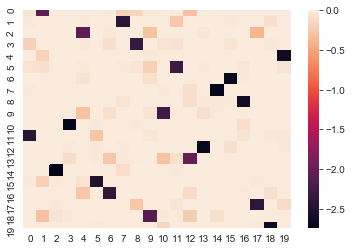

[ 1  7  4  8 19 11 15 14 16 10  3  0 13 12  2  5  6 17  9 18]
[0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.03 0.01 0.03 0.   0.   0.01 0.   0.01 0.   0.   0.   0.02 0.2  0.   0.06 0.   0.   0.   1.   0.   0.3  0.   1.   0.08 0.   0.05 0.   0.03 0.  ]
9.35	19	83	4.76837158203125e-07	1957.1578000000002	0.09375
9.35	19	83	4.76837158203125e-07	1955.0119	0.09375
9.35	19	83	4.172325134277344e-07	1890.9501999999998	0.09375
9.35	19	118	1.5497207641601562e-06	1885.9792	0.09375
9.35	20	118	2.86102294921875e-06	1909.6494000000002	0.09375
8.4	19	105	9.5367431640625e-07	1946.6185	0.0859375
8.4	19	105	8.940696716308594e-07	1956.6733	0.0859375
8.4	19	105	8.344650268554688e-07	1885.9792	0.0859375
8.4	19	105	5.364418029785156e-07	1895.9508	0.0859375
8.4	19	105	6.705522537231445e-08	2043.7253	0.0859375
8.4	19	105	9.5367431640625e-07	1984.7421	0.0859375
8.4	19	105	9.5367431640625e-07	1975.7558	0.0859375
8.4	19	105	9.5367431640625e-07	2047.7975999999999	0.0859375
8.4	19	105	9.5367431640625e-0

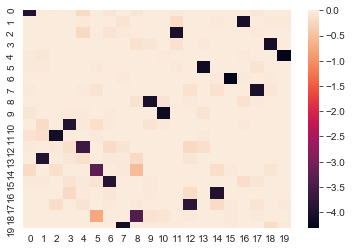

[ 0 16 11 18 19 13 15 17  9 10  3  2  4  1  5  6 14 12  8  7]
[0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.01 0.   0.01 0.   0.   0.   0.02 0.   0.01 0.   0.02 0.01 0.   0.01 0.   0.   0.   0.   0.   0.03 0.04 0.02 0.   0.   0.04 0.03 0.   0.   0.   0.   0.   0.03 0.03 0.01 1.   0.   0.   0.02 0.   0.01 0.01 0.02 0.08 0.18 0.   1.   0.12 0.01 0.01 0.01 0.01 0.   0.   0.07 0.52 1.   0.01]
7.31	19	116	7.62939453125e-05	1941.0975999999998	0.078125
7.31	19	116	7.62939453125e-05	1933.4918	0.078125
7.31	19	116	7.2479248046875e-05	1916.6788999999999	0.078125
7.31	19	116	6.866455078125e-05	1856.5886	0.078125
7.31	19	116	6.103515625e-05	1951.1765999999998	0.078125
7.31	19	116	5.91278076171875e-05	1928.5842	0.078125
7.31	19	116	5.7220458984375e-05	1821.3272000000002	0.078125
7.31	19	116	4.9591064453125e-05	1929.5699	0.078125
6.71	19	116	4.9591064453125e-05	1805.9868999999999	0.07421875
6.71	19	116	4.9591064453125e-05	1890.5

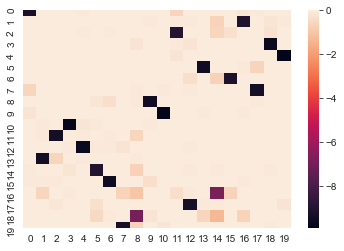

[ 0 16 11 18 19 13 15 17  9 10  3  2  4  1  5  6 14 12  8  7]
[0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.01 0.01 0.   0.   0.   0.01 0.01 0.   0.   0.   0.   0.   0.01 0.01 0.   0.89 0.   0.   0.   0.   0.   0.   0.   0.04 0.1  0.   0.89 0.06 0.   0.   0.   0.   0.   0.   0.03 0.38 0.89 0.   0.   0.   0.   0.05 0.   0.   0.3  0.   0.65 0.01 0.   0.   0.17 0.56 0.65 0.01 0.   0.   0.   0.09 0.   0.   0.02 0.89 0.01 0.01 0.   0.   0.   0.   0.89 0.32 1.   0.   0.03 0.01 0.21 0.89 0.02 0.  ]
5.41	19	116	4.291534423828125e-06	1951.0097999999998	0.06640625
5.41	19	116	4.291534423828125e-06	1834.2981	0.06640625
4.73	19	116	2.1457672119140625e-06	1907.0953	0.0625
4.73	19	116	2.1457672119140625e-06	1965.7419	0.0625
4.73	19	116	2.1457672119140625e-06	1817.4096	0.0625
4.73	19	116	4.76837158203125e-07	1888.7937	0.0625
4.73	19	116

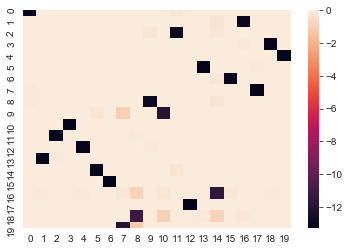

[ 0 16 11 18 19 13 15 17  9 10  3  2  4  1  5  6 14 12  8  7]
[0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.55 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.55 0.   0.   0.   0.   0.   0.   0.   0.   0.02 0.55 0.   0.   0.   0.   0.   0.   0.   0.01 0.   0.16 0.   0.   0.   0.   0.09 0.16 0.   0.   0.   0.   0.   0.   0.   0.   0.55 0.   0.   0.   0.   0.   0.   0.55 0.01 0.86 0.   0.   0.   0.   0.55 0.   0.   0.   0.   0.   0.   0.02 0.   0.55 0.   0.   0.   0.   0.   0.   0.55 0.23 0.   0.55 0.   0.55 0.55 0.55 0.55 1.   0.   0.55 0.01 0.55 0.   0.   0.   0.   0.55 0.   0.55 0.   0.55 0.1  0.11 0.   0.55]
3.4	19	116	3.3881317890172014e-21	1928.6733	0.0546875
3.4	19	116	3.3881317890172014e-21	1883.3758000000003	0.0546875
3.4	19	116	3.388131

In [56]:
reload(runner)
# instance_name="LOP-synthetic,seed=123456,n=20,m=200,phi=0.5"
# instance_name = "pfsp_csum/tai20_5_8.fsp"
# instance_name="pfsp_csum/rec19.txt"
# instance_name="lop/RandB/N-p50-01"
# instance_name="lop/Spec/N-pal13"
# instance_name="lop/xLOLIB/N-be75eec_150"
# instance_name="qap/nug12.dat"
instance_name="qap/test.dat"
budgetGA=10**3#
seed=8
budget=200
m_ini=10
budgetMM=1## NO TOCAR
eval_ranks = True
r_1 = [.1]
r_2 = [.9]
res = []
for ratio_samples_learn in r_1:
  for weight_mass_learn in r_2:
    out_filename = "pickles/"+instance_name.replace("/", "_").replace(".txt", "")#+'_Budget_'+str(budgetMM)
    df = runner.run_once("UMM", instance_name, seed,budget = budget, m_ini = m_ini, budgetMM = budgetMM, ratio_samples_learn = ratio_samples_learn, weight_mass_learn = weight_mass_learn, out_filename = out_filename, eval_ranks=eval_ranks,init='random')
#     res.append([out_filename,ratio_samples_learn, weight_mass_learn,df.Fitness.min()])
# runner.run_once("CEGO", instance_name, seed,budget = budget, m_ini = m_ini, budgetGA = budgetGA, out_filename = out_filename)

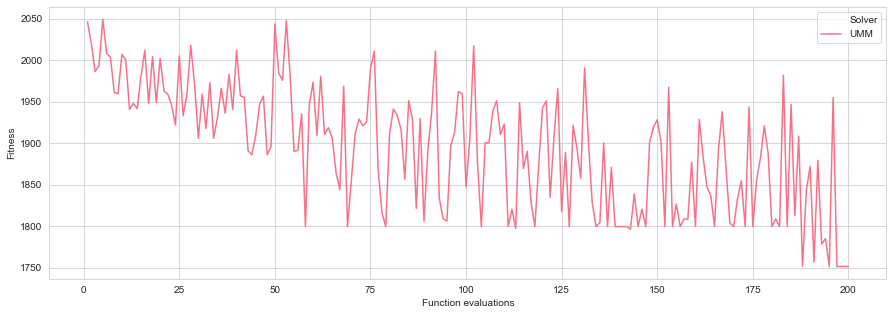

In [58]:
df = pd.read_csv(out_filename+ '.csv.xz')
df
# print("instance name", df.instance.iloc[0], "- time", round(df.run_time.iloc[0], 2))
# print(df.Fitness.min())

color_variable = 'Solver'
y_variables = ['Fitness']#,'Distance','phi_sample'
palette = sns.color_palette("husl", len(df[color_variable].drop_duplicates()))
for y_variable in y_variables:
    plt.figure(figsize=(15,5))
    sns.lineplot(x='Function evaluations',y=y_variable,hue='Solver',data=df, palette=palette)
#     plt.savefig('img/'+instance_name.replace("/", "__").replace(".txt", "")+'order.eps')
    plt.show()

- TFT pfsp_csum/tai20_5_8.fsp.txt"

    - budget=1000  -> 60k

    - budget=5000  -> 60k

    - best sols TFT https://www.researchgate.net/figure/Best-known-solutions-for-Taillards-benchmarks-with-respect-to-total-flowtime-criterion_tbl8_223094938
  
- makespan  pfsp_cmax/tai20_5_8.fsp.txt"

    - best sols makespan https://www.researchgate.net/publication/269820959_Handling_ties_in_heuristics_for_the_permutation_flow_shop_scheduling_problem/link/5e31680ba6fdccd9657373fd/download

0.0  0.7738  0.2868  0.7084  0.9622  0.1727  0.7394  0.6657  0.8948  0.67  
0.6771  0.0  0.7098  0.5374  0.2106  0.7316  0.3374  0.9016  0.5109  0.734  
0.2089  0.5471  0.0  0.9731  0.135  0.2601  0.5542  0.7885  0.5787  0.6157  
0.5452  0.5846  0.8157  0.0  0.4892  0.4497  0.2669  0.6757  0.9142  0.5197  
0.3741  0.7369  0.3431  0.9406  0.0  0.1971  0.6358  0.1655  0.4101  0.2224  
0.4071  0.1274  0.8178  0.6742  0.3055  0.0  0.5203  0.7609  0.1103  0.4902  
0.7078  0.1187  0.7492  0.5126  0.3767  0.8316  0.0  0.3516  0.2644  0.9  
0.0237  0.4754  0.6336  0.7174  0.6519  0.3857  0.2682  0.0  0.6893  1.0086  
0.4993  0.5075  0.6408  0.0897  0.6074  0.0731  0.2126  0.2423  0.0  0.7179  
0.9469  0.6649  0.5806  0.0869  0.3305  0.593  0.7654  0.8525  0.0899  0.0464  
